In [4]:
from model.gaussian_uq import GaussianUQMeasure
from model.trunk_module import TrunkModule
from model.score_losses import *
from model.plotting import *
from model.config_management import load_configs

In [5]:
import pandas as pd
import pickle
import json
import os

In [6]:
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
experiments = json.load(open(r'E:\task_adaptation_dl\model\config1.json', "r"))
print(*experiments['experiments'], sep='\n\n')

LOGS_FOLDER = os.path.abspath(r'data/logs')

all_results = []

for exp in experiments['experiments']:
    name = exp['base_name']
    loss = exp['loss_type']
    dsname = exp['dataset_name']

    EXP_FLD = os.path.join(LOGS_FOLDER, name)

    for log_folder_ext in os.listdir(EXP_FLD):
        log_folder = os.path.join(EXP_FLD, log_folder_ext)
        logs = [os.path.join(log_folder, lf) for lf in os.listdir(log_folder)]

        train_log = [f for f in logs if 'train_metrics' in f][0]
        val_log = [f for f in logs if 'validation_metrics' in f][0]

        train_data = [res[0] for res in pickle.load(open(os.path.abspath(train_log), 'rb'))[loss]]
        val_data = [res[0] for res in pickle.load(open(os.path.abspath(val_log), 'rb'))[loss]]

        setup = log_folder_ext.split('-')
        hparams = dict(zip([hp.split('=')[0] for hp in setup], [hp.split('=')[1] for hp in setup]))

        all_results.append({
            'name': name,
            'loss': loss,
            'dsname': dsname,
            **hparams,
            'train_loss': train_data,
            'val_loss': val_data,
        })
        
        # plt.plot(train_data, label='Train')
        # plt.plot(val_data, label='Validation')
        # plt.title(log_folder_ext)
        # plt.legend()
        # plt.show()
df = pd.DataFrame(all_results)

# results = pickle.load(open(os.path.abspath(r'E:\task_adaptation_dl\data\logs\se_casp_doga\dropout=0.1\train_metrics_at_2026-02-03112005'), 'rb'))
# [res[0] for res in results['gaussian_se']]

{'base_name': 'se_airlines_lr', 'dataset_name': 'airlines', 'lr': [0.01, 0.005, 0.001, 0.0005, 0.0001, 5e-05, 1e-05], 'loss_type': 'gaussian_se', 'num_epochs': 20, 'hidden_dims': [512, 512, 512, 512]}


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\task_adaptation_dl\\data\\logs\\se_airlines_lr'

In [ ]:
df

In [ ]:
cmap1 = plt.get_cmap('Reds')
cmap2 = plt.get_cmap('Greens')
cmap3 = plt.get_cmap('Blues')
cmap4 = plt.get_cmap('Purples')
cmap5 = plt.get_cmap('Oranges')
cmap6 = plt.get_cmap('Greys')
cmap7 = plt.get_cmap('viridis')
cmap8 = plt.get_cmap('magma')

In [5]:
gams = [0.5, 1, 2, 4]
colours = {
    '0.05': {
        'big': dict(zip([None] + [str(g) for g in gams], ['red'] + list(cmap1(gams)))),
        'small': dict(zip([None] + [str(g) for g in gams], ['green'] + list(cmap2(gams)))),
    },
    '0.1': {
        'big': dict(zip([None] + [str(g) for g in gams], ['blue'] + list(cmap3(gams)))),
        'small': dict(zip([None] + [str(g) for g in gams], ['purple'] + list(cmap4(gams)))),
    },
    '0.2': {
        'big': dict(zip([None] + [str(g) for g in gams], ['orange'] + list(cmap5(gams)))),
        'small': dict(zip([None] + [str(g) for g in gams], ['grey'] + list(cmap6(gams)))),
    },
    '0.3': {
        'big': dict(zip([None] + [str(g) for g in gams], [cmap7(1)] + list(cmap7(gams)))),
        'small': dict(zip([None] + [str(g) for g in gams], [cmap8(1)] + list(cmap8(gams)))),
    }
}

NameError: name 'cmap1' is not defined

In [6]:
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use('default')

# plt.rcParams.update({
#     'text.usetex': True,
#     'font.family': 'serif',
# })
from matplotlib.lines import Line2D

In [64]:
loss_annotations = {
    'gaussian_nll': r'$S_{\text{NLL}}$',
    'gaussian_se': r'$S_{\text{SE}}$',
    'gaussian_crps': r'$S_{\text{ES}}$',
    'gaussian_kernel': r'$S_{\gamma}$'
}

0 gaussian_se
1 gaussian_kernel
2 gaussian_nll
3 gaussian_crps


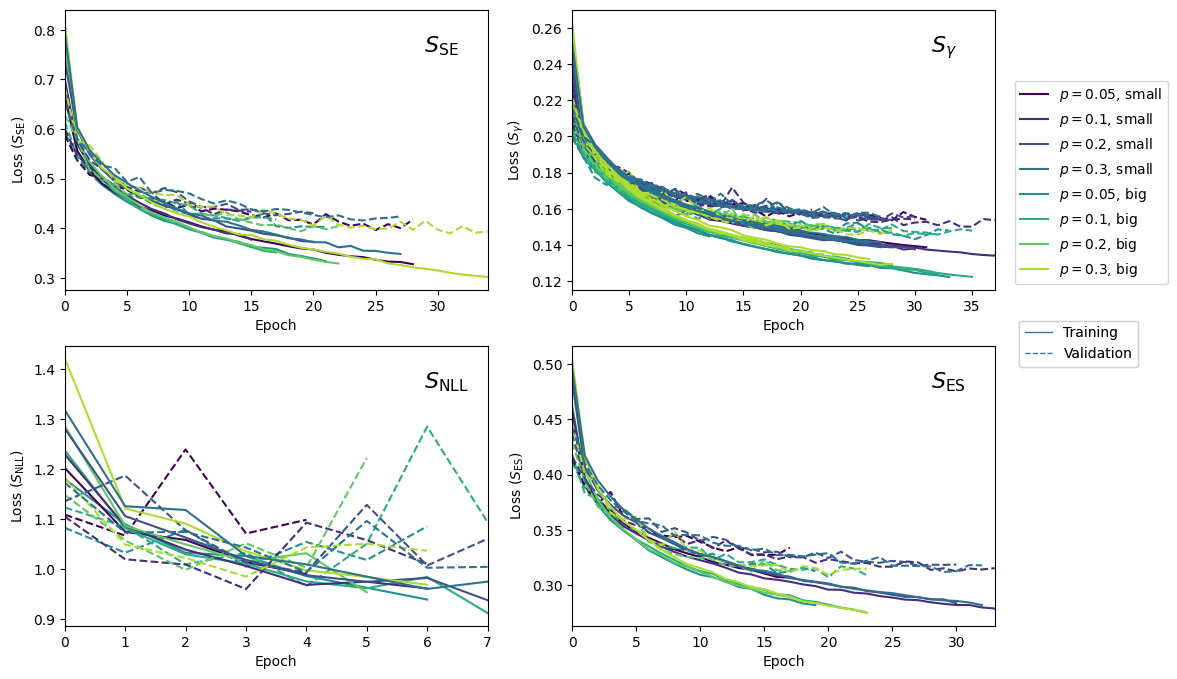

In [76]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

ps = [0.05, 0.1, 0.2, 0.3]

loss_annotations = {
    'gaussian_nll': r'$S_{\text{NLL}}$',
    'gaussian_se': r'$S_{\text{SE}}$',
    'gaussian_crps': r'$S_{\text{ES}}$',
    'gaussian_kernel': r'$S_{\gamma}$'
}

for idx, loss_name in enumerate(df['loss'].unique()):
    print(idx, loss_name)
    ax = axs[idx]
    fdf = df.query(f"loss == '{loss_name}'")

    ax.annotate(loss_annotations[loss_name], xy=(0.85, 0.85), xycoords = 'axes fraction', size=16)

    for ridx, row in fdf.iterrows():
        p = row['dropout']
        arch = 'big' if '32' in row['hidden_dims'] else 'small'
        gam = row['loss_gk_gamma'] if 'kernel' in loss else None
        gamtext = rf", $\gamma = {gam}$" if gam else ''

        color = plt.get_cmap('viridis')(ps.index(float(p)) / 8 + (arch == 'big')/2)
        
        ax.plot(row['train_loss'], label=rf"$p = {p}$, {arch}" + gamtext, ls='-', c=color)
        ax.plot(row['val_loss'], ls='--', c=color)

        ax.set_xlim([0, max(ax.get_xlim()[1], len(row['train_loss']) - 1)])
        ax.set_xlabel('Epoch')
        ax.set_ylabel(f'Loss ({loss_annotations[loss_name]})')
        
handles, labels = ax.get_legend_handles_labels()
order = [1, 3, 5, 7, 0, 2, 4, 6]
fig.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order],
    bbox_to_anchor = (0.75, -0.2, 0.3, 1)
)

legend1 = fig.legend(
    [
        Line2D([0], [0], color='b', lw=1, ls='-'),
        Line2D([0], [0], color='b', lw=1, ls='--')
    ],
    [
        'Training',
        'Validation'
    ],
    bbox_to_anchor = (0.725, -0.5, 0.3, 1)
)
fig.add_artist(legend1)

plt.savefig('figures/losses_casp_doga.pdf', bbox_inches='tight')
plt.savefig('figures/losses_casp_doga.png', bbox_inches='tight')

plt.show()

In [7]:
experiments = json.load(open(r'E:\task_adaptation_dl\model\config2.json', "r"))
print(*experiments['experiments'], sep='\n\n')

LOGS_FOLDER = os.path.abspath(r'data/logs')

all_results = []

for exp in experiments['experiments']:
    name = exp['base_name']
    loss = exp['loss_type']
    dsname = exp['dataset_name']

    EXP_FLD = os.path.join(LOGS_FOLDER, name)

    for log_folder_ext in os.listdir(EXP_FLD):
        log_folder = os.path.join(EXP_FLD, log_folder_ext)
        logs = [os.path.join(log_folder, lf) for lf in os.listdir(log_folder)]

        train_log = [f for f in logs if 'train_metrics' in f][0]
        val_log = [f for f in logs if 'validation_metrics' in f][0]

        train_data = [res[0] for res in pickle.load(open(os.path.abspath(train_log), 'rb'))[loss]]
        val_data = [res[0] for res in pickle.load(open(os.path.abspath(val_log), 'rb'))[loss]]

        setup = log_folder_ext.split('-')
        hparams = dict(zip([hp.split('=')[0] for hp in setup], [hp.split('=')[1] for hp in setup]))

        all_results.append({
            'name': name,
            'loss': loss,
            'dsname': dsname,
            **hparams,
            'train_loss': train_data,
            'val_loss': val_data,
        })
        
        # plt.plot(train_data, label='Train')
        # plt.plot(val_data, label='Validation')
        # plt.title(log_folder_ext)
        # plt.legend()
        # plt.show()
df = pd.DataFrame(all_results)

# results = pickle.load(open(os.path.abspath(r'E:\task_adaptation_dl\data\logs\se_casp_doga\dropout=0.1\train_metrics_at_2026-02-03112005'), 'rb'))
# [res[0] for res in results['gaussian_se']]

{'base_name': 'kernel_airlines_lr', 'dataset_name': 'airlines', 'lr': [0.01, 0.005, 0.001, 0.0005, 0.0001, 5e-05, 1e-05], 'loss_type': 'gaussian_kernel', 'num_epochs': 20, 'hidden_dims': [512, 512, 512, 512]}


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\task_adaptation_dl\\data\\logs\\kernel_airlines_lr'

In [78]:
df

,name,loss,dsname,lr,dropout,hidden_dims,train_loss,val_loss,loss_gk_gamma
0,se_casp_lr,gaussian_se,casp,0.003,0.3,"[64,64,64,64]","[0.7449492839249697, 0.6095819316266022, 0.559...","[0.6644406420784397, 0.5755922237893084, 0.542...",NaN
1,se_casp_lr,gaussian_se,casp,0.01,0.3,"[64,64,64,64]","[0.7496652605233493, 0.634876353826834, 0.6053...","[0.659807923998866, 0.6291994696313684, 0.5700...",NaN
2,kernel_casp_lr,gaussian_kernel,casp,0.003,0.3,"[64,64,64,64]","[0.23844271606498665, 0.20494100364632817, 0.1...","[0.2165742507139286, 0.1972122420589407, 0.187...",2
3,kernel_casp_lr,gaussian_kernel,casp,0.01,0.3,"[64,64,64,64]","[0.23655999752330337, 0.20976838080477325, 0.2...","[0.21169556573137538, 0.20280384944452273, 0.1...",2
4,nll_casp_lr,gaussian_nll,casp,0.003,0.3,"[64,64,64,64]","[1.276870932890263, 1.1265588518067118, 1.0737...","[1.2070554253104684, 1.0882029241615243, 1.071...",NaN
5,nll_casp_lr,gaussian_nll,casp,0.01,0.3,"[64,64,64,64]","[1.2683053369566555, 1.155065229027977, 1.1143...","[1.1702805849222035, 1.1770240631136861, 1.135...",NaN
6,crps_casp_lr,gaussian_crps,casp,0.003,0.3,"[64,64,64,64]","[0.48306774245553363, 0.4125595086521202, 0.38...","[0.4386547943512043, 0.3990122492496784, 0.386...",NaN
7,crps_casp_lr,gaussian_crps,casp,0.01,0.3,"[64,64,64,64]","[0.47639169976427836, 0.42674006518228347, 0.4...","[0.4456238992564328, 0.42488948552758543, 0.39...",NaN


0 gaussian_se
0 (0.267004, 0.004874, 0.329415, 1.0)
150 (0.128087, 0.647749, 0.523491, 1.0)
1 gaussian_kernel
0 (0.267004, 0.004874, 0.329415, 1.0)
150 (0.128087, 0.647749, 0.523491, 1.0)
2 gaussian_nll
0 (0.267004, 0.004874, 0.329415, 1.0)
150 (0.128087, 0.647749, 0.523491, 1.0)
3 gaussian_crps
0 (0.267004, 0.004874, 0.329415, 1.0)
150 (0.128087, 0.647749, 0.523491, 1.0)


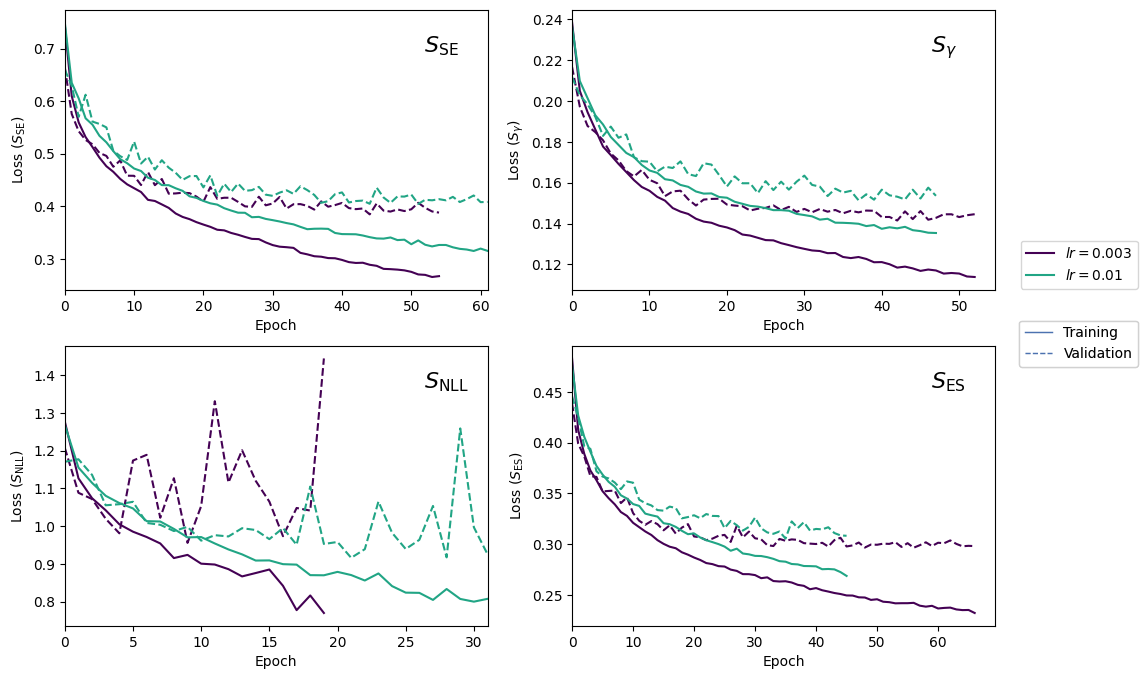

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

cmap = plt.get_cmap('viridis')

lrs = [0.003, 0.01]

loss_annotations = {
    'gaussian_nll': r'$S_{\text{NLL}}$',
    'gaussian_se': r'$S_{\text{SE}}$',
    'gaussian_crps': r'$S_{\text{ES}}$',
    'gaussian_kernel': r'$S_{\gamma}$'
}

for idx, loss_name in enumerate(df['loss'].unique()):
    print(idx, loss_name)
    ax = axs[idx]
    fdf = df.query(f"loss == '{loss_name}'")

    ax.annotate(loss_annotations[loss_name], xy=(0.85, 0.85), xycoords = 'axes fraction', size=16)

    for ridx, row in fdf.iterrows():
        lr = row['lr']

        loc = 150*lrs.index(float(lr))
        color = cmap(loc)
        print(loc, color)
        
        ax.plot(row['train_loss'], label=rf"$lr = {lr}$", ls='-', c=color)
        ax.plot(row['val_loss'], ls='--', c=color)

        ax.set_xlim([0, max(ax.get_xlim()[1] if ridx > 0 else 0, len(row['train_loss']) - 1)])
        ax.set_xlabel('Epoch')
        ax.set_ylabel(f'Loss ({loss_annotations[loss_name]})')
        
handles, labels = ax.get_legend_handles_labels()
order = [0, 1]
fig.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order],
    bbox_to_anchor = (0.725, -0.4, 0.3, 1)
)
# fig.legend(bbox_to_anchor = (0.75, -0.2, 0.3, 1))

legend1 = fig.legend(
    [
        Line2D([0], [0], color='b', lw=1, ls='-'),
        Line2D([0], [0], color='b', lw=1, ls='--')
    ],
    [
        'Training',
        'Validation'
    ],
    bbox_to_anchor = (0.725, -0.5, 0.3, 1)
)
fig.add_artist(legend1)

plt.savefig('figures/losses_casp_lr.pdf', bbox_inches='tight')
plt.savefig('figures/losses_casp_lr.png', bbox_inches='tight')

plt.show()

In [7]:
from model.trunk_module import TrunkModule

In [8]:
import torch

In [9]:
from model.datasets import get_dataset, get_dataloader
from model.plotting import running_average
from tqdm import tqdm

In [23]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

loss_annotations = {
    'gaussian_nll': r'$S_{\text{NLL}}$',
    'gaussian_se': r'$S_{\text{SE}}$',
    'gaussian_crps': r'$S_{\text{ES}}$',
    'gaussian_kernel': r'$S_{\gamma}$'
}

def create_uq_vis(
    model: TrunkModule,
    loss
):
    BATCH_SIZE = 128
    NUM_PREDICTORS = 100
    GAMMA = 2.0
    NAME_TO_SCORE = {
        "kernel": GaussianKernelScore,
        "var": SquaredError,  # TODO: check this
        "log": NLL,
        "crps": NormalCRPS,
    }

    measures = ["crps", "kernel", "log", "var"]
    
    dataset = get_dataset("casp")
    
    # model = TrunkModule.load("crsp_casp_test\\lr=0.003-dropout=0.3-hidden_dims=[64,64,64,32]__best")
    
    model.eval_mcdropout()
    
    features = torch.from_numpy(dataset.test_features.copy().astype(np.float32))
    labels = torch.from_numpy(dataset.test_labels.copy().astype(np.float32))
    device = torch.device('cpu')
    model = model.to(device)
    
    losses = dict([(measure, []) for measure in measures])
    aus = dict([(measure, []) for measure in measures])
    eus = dict([(measure, []) for measure in measures])
    tus = dict([(measure, []) for measure in measures])
    
    
    print(features.shape, labels.shape)
    print(measures)
    for batch_X, batch_y in tqdm(
        get_dataloader(features, labels, BATCH_SIZE),
        desc="UQ predictions",
    ):
        # print('batch', flush=True)
        predictions = torch.stack(
            [model(batch_X.to(device)) for _ in range(NUM_PREDICTORS)], dim=-1
        )
        
        # pred2 = torch.rand(BATCH_SIZE, 2, NUM_PREDICTORS)  # Example mu2 tensor
        uq = GaussianUQMeasure(
            predictions,
            variant="pairwise",
            second_order="mc_dropout",
            gamma=GAMMA,
        )
        
        for measure in measures:
            # print(measure, end=', ')
            # print(predictions.shape, batch_y.shape)
            au, eu, tu = uq.get_uncertainties(measure=measure)
            
            loss = NAME_TO_SCORE[measure](reduction=None, loss_gk_gamma=GAMMA)(
                predictions.mean(dim=-1), batch_y.to(device)
            ).flatten()
            
            losses[measure].append(loss)
            tus[measure].append(tu)
            aus[measure].append(au)
            eus[measure].append(eu)

    return losses, tus, aus, eus


def actually_visualize(losses, unc, sort_by: str, run_avg_len = 50, save: str = None, measure_labels: dict = None):
    plt.figure(figsize=(6, 4))
    
    measures = ["crps", "kernel", "log", "var"]
    if measure_labels is None:
        measure_labels = dict(zip(measures, measures))
    
    for measure in measures:
        losses_pt = torch.cat(losses[measure]).flatten()
        
        unc_pt = torch.cat(unc[measure]).flatten()
        uncs_sorted, uncs_indices = torch.sort(unc_pt, descending=True)
        plt.plot(running_average(losses_pt[uncs_indices].detach().numpy(), run_avg_len), label=measure_labels[measure], lw=1)
        
        plt.ylabel(rf"Loss ({loss_annotations[loss]})")
        plt.xlabel(rf"Dataset item (by decreasing {sort_by.upper()})")
    plt.legend()

    if save:
        plt.savefig(save + '.pdf', bbox_inches='tight')
        plt.savefig(save + '.png', bbox_inches='tight')
    
    plt.show()

torch.Size([9146, 9]) torch.Size([9146, 1])
['crps', 'kernel', 'log', 'var']


UQ predictions: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:30<00:00,  2.36it/s]


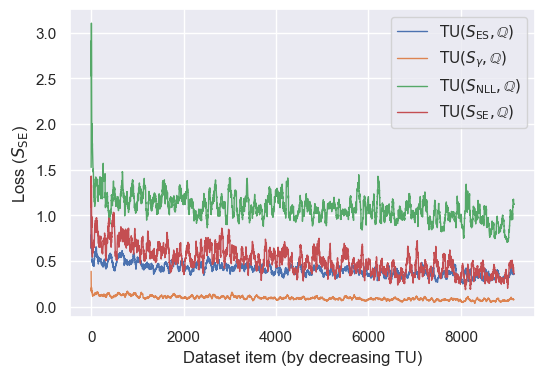

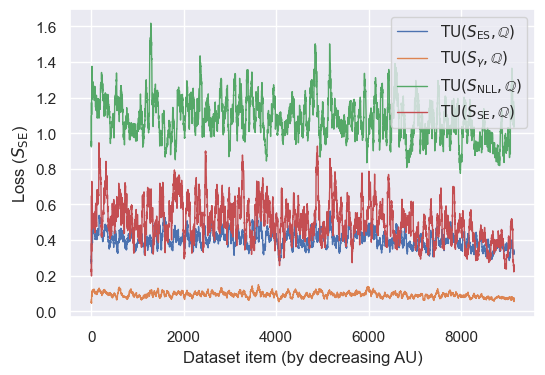

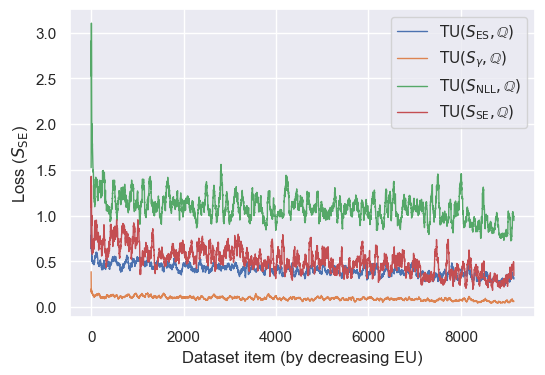

torch.Size([9146, 9]) torch.Size([9146, 1])
['crps', 'kernel', 'log', 'var']


UQ predictions: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:33<00:00,  2.16it/s]


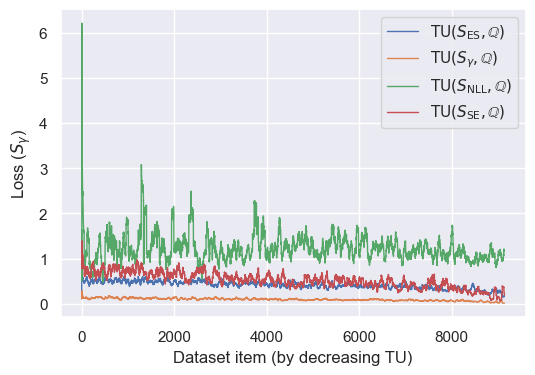

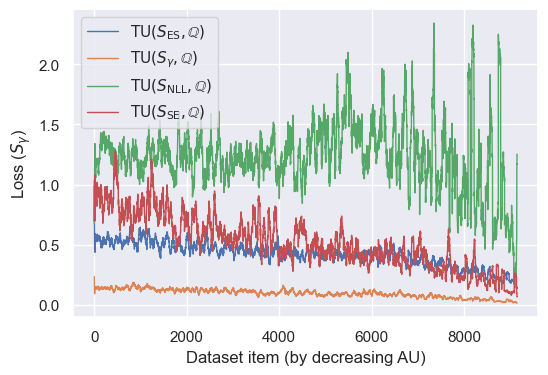

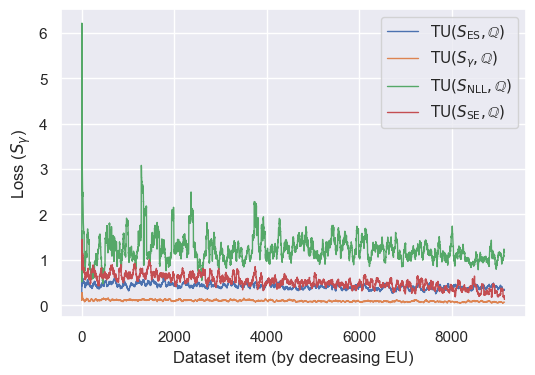

torch.Size([9146, 9]) torch.Size([9146, 1])
['crps', 'kernel', 'log', 'var']


UQ predictions: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:29<00:00,  2.40it/s]


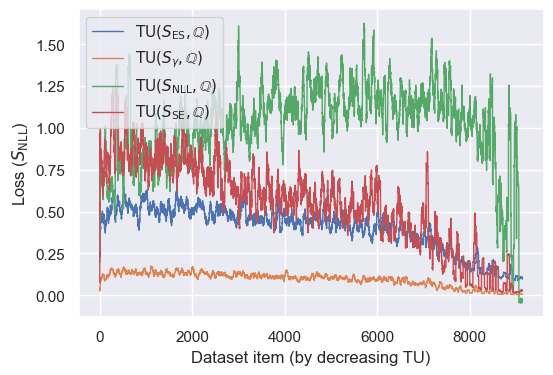

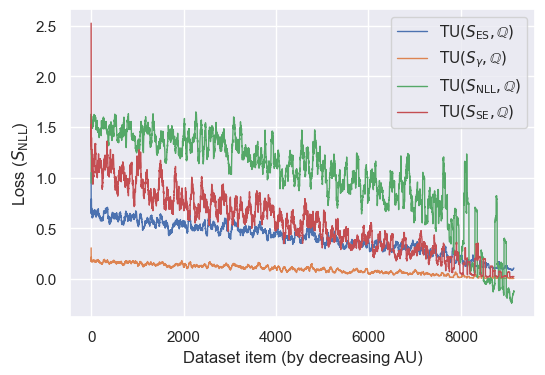

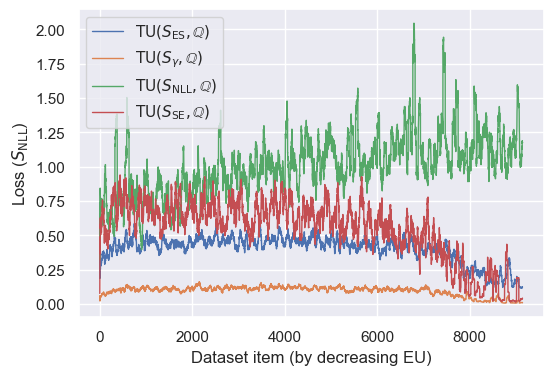

torch.Size([9146, 9]) torch.Size([9146, 1])
['crps', 'kernel', 'log', 'var']


UQ predictions:  46%|████████████████████████████████████████████████████████████                                                                       | 33/72 [00:45<00:22,  1.77it/s]

In [ ]:
experiments = json.load(open(r'E:\task_adaptation_dl\model\config3_test.json', "r"))
# print(*experiments['experiments'], sep='\n\n')

MODELS_FOLDER = os.path.abspath(r'data/models/')

def get_measure_labels(unc_type):
    return {
        'crps': r"$\text{" + unc_type + r"}{( " + loss_annotations['gaussian_crps'][1:-1] + r", \mathbb{Q} )}$",
        'kernel': r"$\text{" + unc_type + r"}{( " + loss_annotations['gaussian_kernel'][1:-1] + r", \mathbb{Q} )}$",
        'log': r"$\text{" + unc_type + r"}{( " + loss_annotations['gaussian_nll'][1:-1] + r", \mathbb{Q} )}$",
        'var': r"$\text{" + unc_type + r"}{( " + loss_annotations['gaussian_se'][1:-1] + r", \mathbb{Q} )}$",
    }

for exp in experiments['experiments']:
    name = exp['base_name']
    loss = exp['loss_type']
    dsname = exp['dataset_name']
    
    EXP_FLD = os.path.join(MODELS_FOLDER, name)
    best_model = [f for f in os.listdir(EXP_FLD) if 'best' in f][0]
    
    model = TrunkModule.load(name + '/' + best_model)
    
    losses, tus, aus, eus = create_uq_vis(model, loss=loss)
    actually_visualize(losses, tus, 'TU', run_avg_len=50, save=os.path.join('figures', 'uq_' + loss + '_tu'), measure_labels=get_measure_labels('TU'))
    actually_visualize(losses, aus, 'AU', run_avg_len=50, save=os.path.join('figures', 'uq_' + loss + '_au'), measure_labels=get_measure_labels('TU'))
    actually_visualize(losses, eus, 'EU', run_avg_len=50, save=os.path.join('figures', 'uq_' + loss + '_eu'), measure_labels=get_measure_labels('TU'))

    del losses, tus, aus, eus